In [14]:
import os 
import cv2
import glob
import scipy.misc
import scipy.ndimage
import numpy as np
import scipy.ndimage
import scipy.misc
import matplotlib.pyplot as plt
%matplotlib inline

# glob.glob
使用通配符查找路径下的某种文件,返回一个列表,每个元素都是符合要求类型的文件，为str类型

In [15]:
def get_image_path(dir_path):
    dir_path=os.path.join(os.getcwd(),dir_path)
    image_paths=glob.glob(os.path.join(dir_path,'*.bmp'))#glob
    return image_paths
image_paths=get_image_path('Train')
# len(image_paths)

In [21]:
help(np.array)

Help on built-in function array in module numpy.core.multiarray:

array(...)
    array(object, dtype=None, copy=True, order='K', subok=False, ndmin=0)
    
    Create an array.
    
    Parameters
    ----------
    object : array_like
        An array, any object exposing the array interface, an object whose
        __array__ method returns an array, or any (nested) sequence.
    dtype : data-type, optional
        The desired data-type for the array.  If not given, then the type will
        be determined as the minimum type required to hold the objects in the
        sequence.  This argument can only be used to 'upcast' the array.  For
        downcasting, use the .astype(t) method.
    copy : bool, optional
        If true (default), then the object is copied.  Otherwise, a copy will
        only be made if __array__ returns a copy, if obj is a nested sequence,
        or if a copy is needed to satisfy any of the other requirements
        (`dtype`, `order`, etc.).
    order : {'K'

(242, 334, 3)
(145, 275, 3)
(298, 383, 3)
(111, 123, 3)
(314, 288, 3)
(137, 198, 3)
(320, 432, 3)
(334, 435, 3)
(237, 374, 3)
(129, 143, 3)
(351, 372, 3)
(155, 191, 3)
(305, 444, 3)
(154, 189, 3)
(149, 155, 3)
(223, 319, 3)
(185, 276, 3)
(176, 197, 3)
(187, 279, 3)
(164, 187, 3)
(211, 315, 3)
(348, 435, 3)
(197, 395, 3)
(219, 247, 3)
(174, 241, 3)
(191, 249, 3)
(131, 149, 3)
(155, 151, 3)
(132, 150, 3)
(153, 251, 3)
(168, 178, 3)
(119, 114, 3)
(309, 316, 3)
(121, 182, 3)
(351, 436, 3)
(107, 116, 3)
(202, 245, 3)
(200, 333, 3)
(190, 180, 3)
(202, 219, 3)
(163, 195, 3)
(176, 215, 3)
(134, 278, 3)
(178, 179, 3)
(307, 308, 3)
(122, 128, 3)
(151, 136, 3)
(178, 220, 3)
(188, 272, 3)
(185, 365, 3)
(105, 119, 3)
(191, 246, 3)
(182, 247, 3)
(181, 230, 3)
(277, 285, 3)
(137, 240, 3)
(139, 266, 3)
(198, 291, 3)
(176, 215, 3)
(330, 218, 3)
(198, 424, 3)
(241, 431, 3)
(160, 174, 3)
(290, 411, 3)
(157, 374, 3)
(163, 157, 3)
(179, 172, 3)
(387, 367, 3)
(209, 314, 3)
(132, 218, 3)
(279, 285, 3)
(240, 

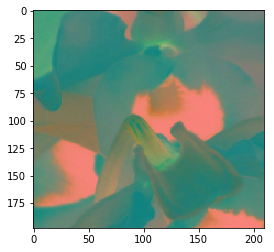

In [17]:
for step,image in enumerate(image_paths):
#     image=cv2.imread(image)
    image=scipy.misc.imread(image,mode='YCbCr').astype(np.float)#通过scipy.imread('图片路径可以读入图片')，返回值为np.ndarray类型
    print (image.shape)#注意，image是三个通道的数据，
    plt.imshow(image)#注意，使用YCBCR格式读入图片显示和正常的不太一样
    

In [18]:
def slicing_image(inp,label,I,L,stride):
    sub_inputs=[]
    sub_labels=[]
    h,w=inp.shape[0],inp.shape[1]
    offset=abs(I-L)//2
    for hh in range(0,h-I+1,stride):
        for ww in range(0,w-I+1,stride):
            sub_input=inp[hh:hh+I,ww:ww+I]
            sub_label=label[hh+offset:hh+offset+L,ww+offset:ww+offset+L]
            sub_input=sub_input.reshape(I,I,1)
            sub_label=sub_label.reshape(L,L,1)
            sub_inputs.append(sub_input)
            sub_labels.append(sub_label)
    return sub_inputs,sub_labels

    

In [22]:
def make_input(config):
    inputs=[]
    labels=[]
    dir_path=config['dir_path']
    scale=config['scale']
    is_grayscale=config['input_size']
    I=config['input_size']
    L=config['label_size']
    stride=config['stride']
    image_paths=get_image_paths(dir_path)
    for path in image_paths:
        image=imread(path,is_grayscale)
        inp,label=process_iamge(image,scale)
        sub_inputs,sub_labels=slice_image(inp,label,I,L,stride)
        inputs+=sub_inputs
        labels+=sub_labels
    inputs=np.asarray(inputs)
    labels=np.asarray(labels)
    return inputs,labels


In [ ]:
def mod_crop(image,scale=3):
    if is_grayscale:
        return scipy.misc.imread(image_path,flatten=True,mode='YCbCr')
    else:
        return scipy.misc.imread(image_path,mode='YCbCr').astype(np.float)
    

In [ ]:
def process_image(image,scale=3):
    label=mod_crop(image,scale)
    label=label/255
    inp=scipy.ndimage.interpolation.zoom(label,(1./scale),prefilter=False)
    inp=

In [ ]:
# help(scipy.ndimage.interpolation.zoom)
a=np.random.randint(0,10,(3,3,3))
a=scipy.ndimage.interpolation.zoom(a,1/3,prefilter=False)#尺度变化为原来的1/3
a.shape


In [ ]:
help(scipy.misc.imread)

# OS
使用当前的

In [ ]:
os.getcwd()#返回当前的路径

In [ ]:
scipy.misc.imread(image_path,flatten=True,mode='YCbCr')